In [1]:
import warnings
warnings.filterwarnings('ignore')

import itertools
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
import sys

from scipy.stats import spearmanr


%matplotlib inline
%config InlineBackend.figure_format = 'svg'
mpl.rcParams['figure.autolayout'] = False

In [2]:
sns.set(**PAPER_PRESET)
#fontsize = PAPER_FONTSIZE

In [3]:
np.random.seed(2019)

## 1. Variables

In [4]:
VSMC_rep1_f = 'feature_counts/V1_21d/V1_21d.counts.txt'
VSMC_rep2_f = 'feature_counts/V2_21d/V2_21d.counts.txt'
HEK_rep1_f = 'feature_counts/SRR629569/SRR629569.counts.txt'
HEK_rep2_f = 'feature_counts/SRR629570/SRR629570.counts.txt'

## 2. Import data

In [5]:
VSMC_rep1 = pd.read_table(VSMC_rep1_f, skiprows=1)
VSMC_rep2 = pd.read_table(VSMC_rep2_f, skiprows=1)
HEK_rep1 = pd.read_table(HEK_rep1_f, skiprows=1)
HEK_rep2 = pd.read_table(HEK_rep2_f, skiprows=1)

## 3. Heatmap comparing counts 

In [6]:
VSMC_rep1_counts = VSMC_rep1[['Geneid','hisat2//V1_21d/V1_21d.bam']]
VSMC_rep2_counts = VSMC_rep2[['Geneid','hisat2//V2_21d/V2_21d.bam']]
HEK_rep1_counts = HEK_rep1[['Geneid','hisat2//SRR629569/SRR629569.bam']]
HEK_rep2_counts = HEK_rep2[['Geneid','hisat2//SRR629570/SRR629570.bam']]

In [7]:
all_1 = VSMC_rep1_counts.merge(VSMC_rep2_counts,how='outer').merge(HEK_rep1_counts,how='outer').merge(HEK_rep2_counts,how='outer')

In [8]:
#all_samples = HUES64_counts.merge(mESC_counts, on="barcode", how="outer")
all_1.drop("Geneid", axis=1, inplace=True)
#cols = [x for x in HUES64_cols if x != "barcode"]
all_1 = np.log10(all_1+1)
all_samples_corr = all_1.corr(method="pearson")

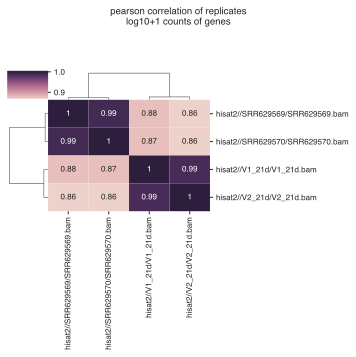

In [20]:
cmap = sns.cubehelix_palette(as_cmap=True)
cg = sns.clustermap(all_samples_corr, figsize=(5,5), cmap=cmap, annot=True)
_ = plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.suptitle("pearson correlation of replicates\nlog10+1 counts of genes")
plt.subplots_adjust(top=0.8)
cg.savefig("corr_heatmap.pearson.svg", dpi="figure", transparent=True, bbox_inches="tight")

## Add counts from replicates 

In [9]:
VSMC_all = VSMC_rep1_counts.merge(VSMC_rep2_counts,how='outer')
HEK_all = HEK_rep1_counts.merge(HEK_rep2_counts,how='outer')

In [10]:
VSMC_all.columns = ["gene_id","rep1","rep2"]
HEK_all.columns = ["gene_id","rep1","rep2"]

In [11]:
reps = ["rep1","rep2"]
VSMC_all['VSMC'] = VSMC_all[reps].sum(axis=1)
HEK_all['HEK'] = HEK_all[reps].sum(axis=1)

## write files 

In [12]:
VSMC_all.to_csv("VSMC_all.counts.voom.txt", sep="\t", index=False)
HEK_all.to_csv("HEK_all.counts.voom.txt", sep="\t", index=False)